# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4] ~ In[6], Out[4] ~ In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [4]:
#1 將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
cut_rule = [-0.1, 0, 2, 5, app_train['CNT_CHILDREN'].max()]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)

#查看cut後的欄位
print(app_train['CNT_CHILDREN_GROUP'])

#查看cut後各分組的數量
app_train['CNT_CHILDREN_GROUP'].value_counts()

0         (-0.101, 0.0]
1         (-0.101, 0.0]
2         (-0.101, 0.0]
3         (-0.101, 0.0]
4         (-0.101, 0.0]
              ...      
307506    (-0.101, 0.0]
307507    (-0.101, 0.0]
307508    (-0.101, 0.0]
307509    (-0.101, 0.0]
307510    (-0.101, 0.0]
Name: CNT_CHILDREN_GROUP, Length: 307511, dtype: category
Categories (4, interval[float64]): [(-0.101, 0.0] < (0.0, 2.0] < (2.0, 5.0] < (5.0, 19.0]]


(-0.101, 0.0]    215371
(0.0, 2.0]        87868
(2.0, 5.0]         4230
(5.0, 19.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [5]:
#2-1 根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL
grp = ['CNT_CHILDREN_GROUP']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']

#查看group後'AMT_INCOME_TOTAL'的情形
for name,group in grouped_df:
    print (name)
    print (group)

grouped_df.mean()

(-0.101, 0.0]
0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 215371, dtype: float64
(0.0, 2.0]
6         171000.0
10        112500.0
13        225000.0
17         81000.0
19         90000.0
            ...   
307485    270000.0
307486    292500.0
307491     90000.0
307494    270000.0
307502     94500.0
Name: AMT_INCOME_TOTAL, Length: 87868, dtype: float64
(2.0, 5.0]
91        171000.0
92        135000.0
144        58500.0
180       180000.0
182       225000.0
            ...   
307293    135000.0
307329    135000.0
307387    180000.0
307462    135000.0
307501     81000.0
Name: AMT_INCOME_TOTAL, Length: 4230, dtype: float64
(5.0, 19.0]
3079       85500.0
7204      157500.0
12615     112500.0
17516     315000.0
23881     180000.0
25669     157500.0
26195     180000.0
32717     112500.0
34545     3

CNT_CHILDREN_GROUP
(-0.101, 0.0]    166288.713566
(0.0, 2.0]       174725.712648
(2.0, 5.0]       173626.303191
(5.0, 19.0]      147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

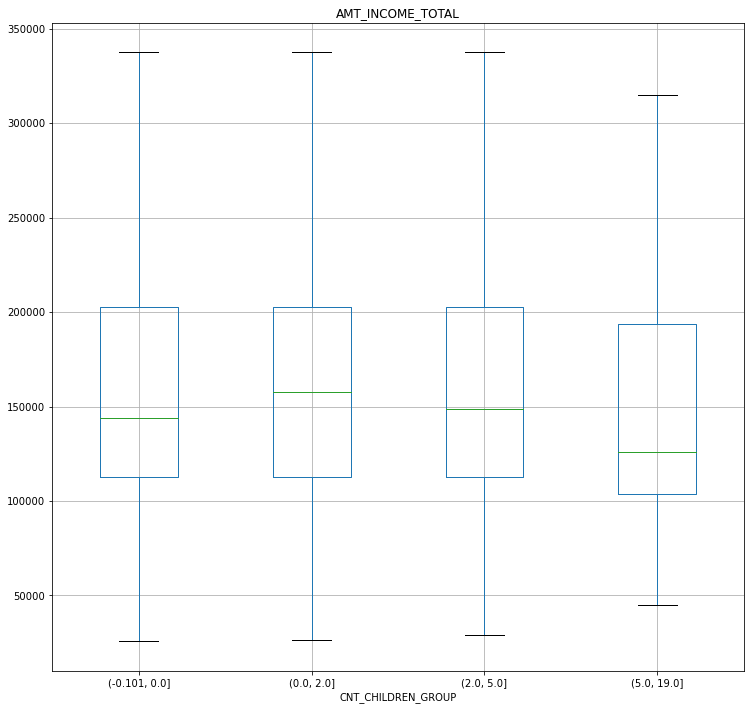

In [6]:
#2-2 繪製 boxplot，縱軸值為'AMT_INCOME_TOTAL'，橫軸分群依據'CNT_CHILDREN_GROUP'
plt_column = ['AMT_INCOME_TOTAL']
plt_by = 'CNT_CHILDREN_GROUP'

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [7]:
#3 根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-np.mean(x))/np.std(x))

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.345857
1,270000.0,0.990556
2,67500.0,-0.943540
3,135000.0,-0.298841
4,121500.0,-0.427781
